# Place Cell Ratio

In [1]:
from typing import Tuple

import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from param import *
from util import get_place_cell

output_dir = ParamDir().OUTPUT_ROOT/ "data_exploration/"

In [2]:
def get_place_cell_ratio(data_name):
    # print(data_name)
    with open(output_dir/data_name/"MI_all.pickle","rb") as f:
        results_all = pickle.load(f)

    # with open(ParamDir().OUTPUT_ROOT/"time_series_classification"/"rocket_permutation_test_results.pickle","rb") as f:
    #     p_results = pickle.load(f)
    # WT_count = p_results["WT"]
    # KO_count = p_results["KO"]

    pc_beh_id, pc_event_id = get_place_cell(results_all, 0.01)
    # print(f"behavior shuffled method PC ratio: {len(pc_beh_id)/len(results_all['original MI']) :.2f}")
    # if "KO" in data_name:
    #     r = [i for i in KO_count["P-values/Score"] if data_name in i[2]]
    #     print(f"permutation results: \n {r}")
    # else:
    #     r = [i for i in WT_count["P-values/Score"] if data_name in i[2]]
    #     print(f"permutation results: \n {r}")
    return len(pc_beh_id)/len(results_all['original MI'])

Text(0.5, 0, 'permutation test')

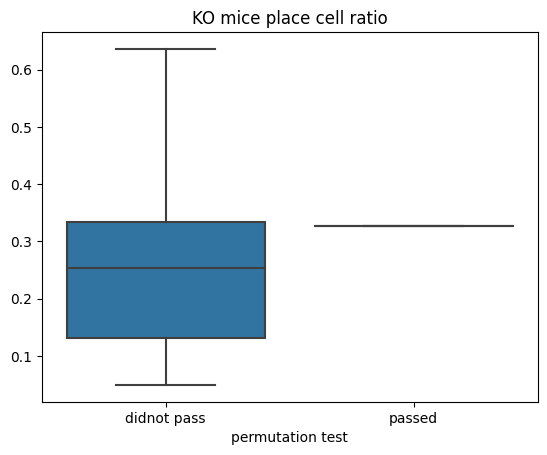

In [3]:
get_place_cell_ratio("091317 OF CaMKII HKO M19-n1")
KO_names = ["091317 OF CaMKII HKO M19-n1"] # mice that passed the test
pass_res = []
not_pass_res = []
for data_dir in ParamDir().data_list:
    data_name = str(data_dir).split('/')[-1]
    ratio = get_place_cell_ratio(data_name)
    if data_name not in KO_names:
        not_pass_res.append(ratio)
    else:
        pass_res.append(ratio)
fig, ax = plt.subplots()
sns.boxplot([not_pass_res, pass_res], ax=ax)
ax.set_xticklabels(["didnot pass", "passed"])
plt.title("KO mice place cell ratio")
plt.xlabel("permutation test")

## WT

Text(0.5, 0, 'permutation test')

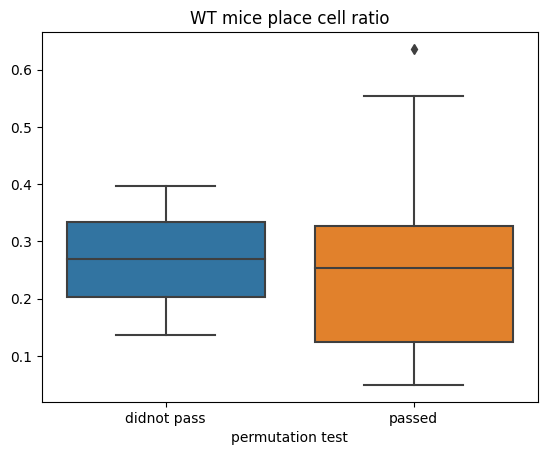

In [4]:
WT_names = ["M45_042718_OF", "M46_042718_OF", "092217 OF CaMKII WT M29-n1"] # mice that didn't pass the test
pass_res = []
not_pass_res = []
for data_dir in ParamDir().data_list:
    data_name = str(data_dir).split('/')[-1]
    ratio = get_place_cell_ratio(data_name)
    if data_name in WT_names:
        not_pass_res.append(ratio)
    else:
        pass_res.append(ratio)
fig, ax = plt.subplots()
sns.boxplot([not_pass_res, pass_res], ax=ax)
ax.set_xticklabels(["didnot pass", "passed"])
plt.title("WT mice place cell ratio")
plt.xlabel("permutation test")